# Cotton Plant Disease with Transfer Learning

In [92]:
#pip install tensorflow_hub

### Import Required Libraries and Modules

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from skimage.transform import resize
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras import Sequential, layers, applications
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow import keras

### Collect Image Paths for Each Flower Category (Aphids,Army_worm,Bacterial_Blight,Healthy,Powdery_mildew, Target_spot)

In [4]:
Aphids = glob('Cotton plant/Cotton plant/Aphids/*.jpg')
Army_worm = glob('Cotton plant/Cotton plant/Army worm/*.jpg')
Bacterial_Blight = glob('Cotton plant/Cotton plant/Bacterial Blight/*.jpg')
Healthy = glob('Cotton plant/Cotton plant/Healthy/*.jpg')
Powdery_Mildew = glob('Cotton plant/Cotton plant/Powdery Mildew/*.jpg')
Target_spot = glob('Cotton plant/Cotton plant/Target spot/*.jpg')

In [18]:
len(Aphids)

400

In [16]:
len(Army_worm)

400

In [20]:
len(Bacterial_Blight)

400

In [22]:
len(Healthy)

390

In [24]:
len(Powdery_Mildew)

400

In [26]:
len(Target_spot)

390

### Define Classes and Corresponding Labels

In [28]:
classes = {0: 'Aphids', 1: 'Army_worm', 2: 'Bacterial_Blight', 3: 'Healthy', 4: 'Powdery_Mildew', 5:'Target_spot'}

### Load and Label Images for Each Cotton plant Category

In [30]:
images = []
labels = []

for i in Aphids:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)

for i in Army_worm:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)

for i in Bacterial_Blight:
    img = plt.imread(i)
    images.append(img)
    labels.append(2)

for i in Healthy:
    img = plt.imread(i)
    images.append(img)
    labels.append(3)

for i in Powdery_Mildew:
    img = plt.imread(i)
    images.append(img)
    labels.append(4)

for i in Target_spot:
    img = plt.imread(i)
    images.append(img)
    labels.append(5)

### Plot first few images

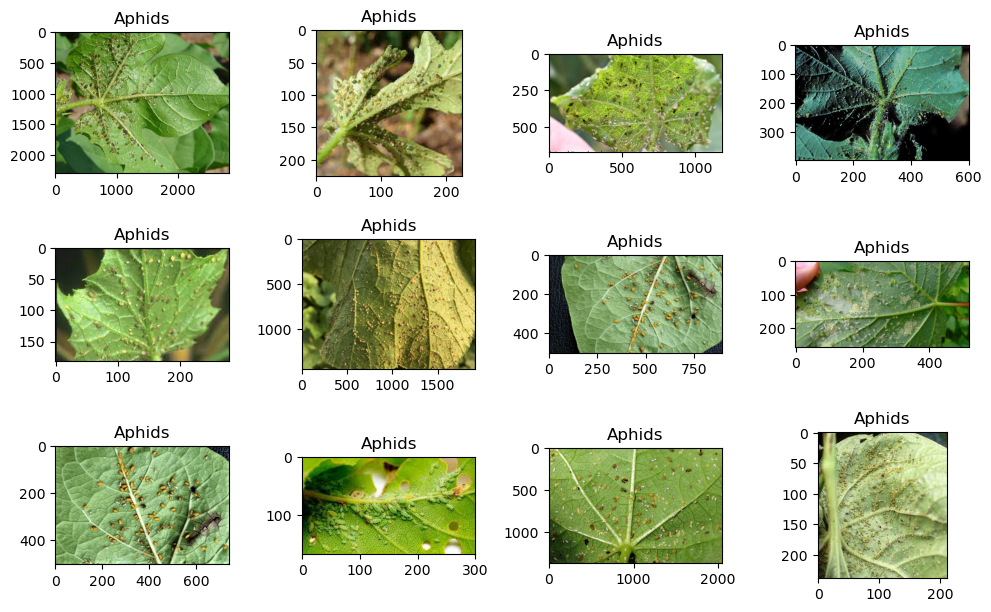

In [32]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

### Shuffle the images

In [34]:
images,labels = shuffle(images,labels)

### Plot some of the image after the shuffle

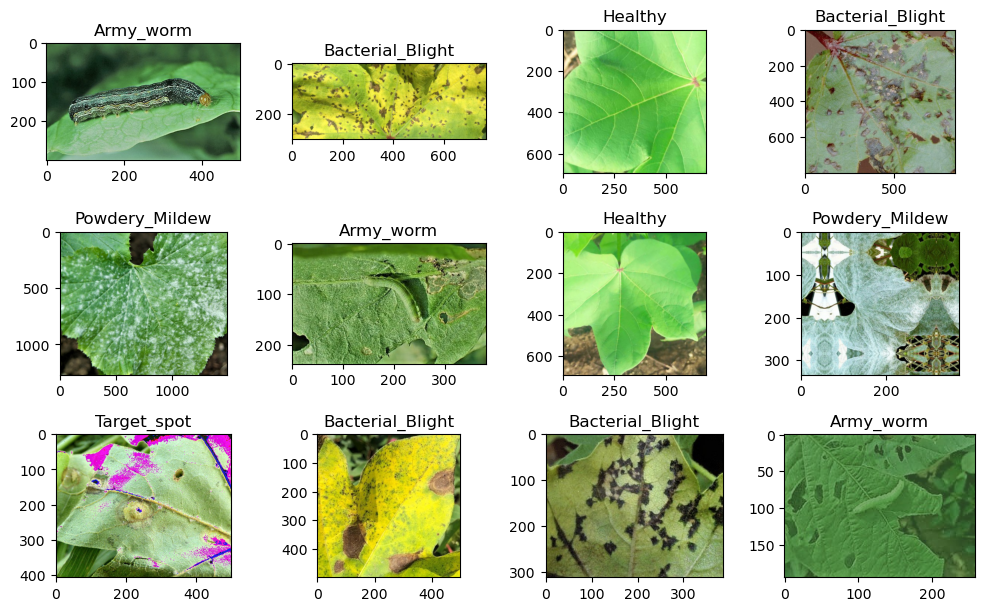

In [36]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

### Resize Images to MobileNetV2 Input Shape (224,224,3)

In [38]:
X = []

for i in images:
    X.append(resize(i, (224,224,3)))

### Plot some of the images after resizing

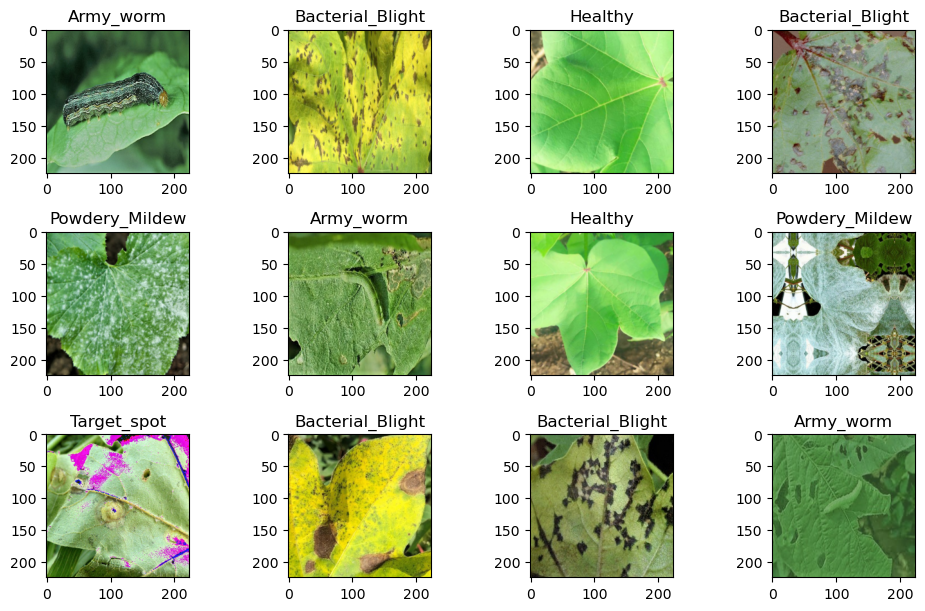

In [40]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

### Convert image and label datatypes from list to Numpy array

In [43]:
X = np.array(X)
y = np.array(labels)

### Convert Images and Labels to NumPy Arrays

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### MobileNetV2 Pre-trained Feature Extractor Model URL 
* "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [47]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

### Load Pre-trained MobileNetV2 Feature Extractor Model

In [49]:
hub.load(feature_extractor_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x17e8498c110>

### Define Number of Output Classes

In [60]:
num_of_classes = 5

### Instantiate MobileNetV2 without Top Layer as Feature Extractor

In [62]:
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224,224,3), trainable = False
)

### Build Transfer Learning Model using MobileNetV2 Feature Extractor

In [70]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(6,activation='softmax')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile Transfer Learning Model

In [72]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [74]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      11,944,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,949,926 (45.59 MB)

 Trainable params: 11,949,926 (45.59 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [77]:
model.fit(X_train,y_train, epochs = 10, validation_split =.2,batch_size=16)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 272ms/step - accuracy: 0.6238 - loss: 0.9896 - val_accuracy: 0.6010 - val_loss: 0.9755
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 284ms/step - accuracy: 0.8176 - loss: 0.5228 - val_accuracy: 0.8005 - val_loss: 0.6044
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 265ms/step - accuracy: 0.9424 - loss: 0.2277 - val_accuracy: 0.7244 - val_loss: 0.8593
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 63s 482ms/step - accuracy: 0.9407 - loss: 0.1718 - val_accuracy: 0.7612 - val_loss: 0.7817
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 62s 245ms/step - accuracy: 0.9870 - loss: 0.0543 - val_accuracy: 0.7848 - val_loss: 0.8163
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 267ms/step - accuracy: 0.9877 - loss: 0.0585 - val_accuracy: 0.7585 - val_loss: 0.9073
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 272ms/step - accuracy: 0.9922 - loss: 0.0459 - val_accuracy: 0.7690 - val_loss: 0.9071
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 258ms/step - accuracy: 0.9978 - loss: 0.0161 - val_accu

### Model Prediction on Test Data

In [79]:
y_pred = model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step


In [81]:
y_pred = [np.argmax(i) for i in y_pred]

### Calculate Accuracy Score

In [84]:
accuracy_score(y_test,y_pred)

0.7289915966386554

### Plot confusion matrix on heatmap

<Axes: >

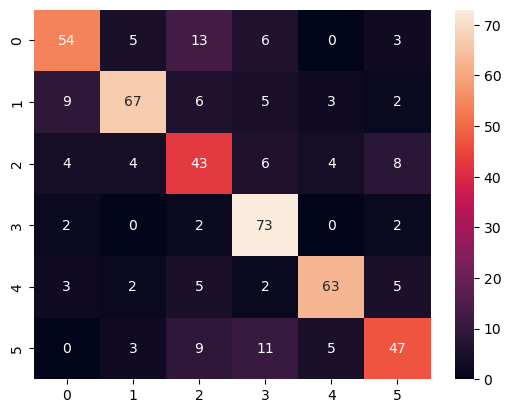

In [87]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

### Print classification report

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71        81
           1       0.83      0.73      0.77        92
           2       0.55      0.62      0.59        69
           3       0.71      0.92      0.80        79
           4       0.84      0.79      0.81        80
           5       0.70      0.63      0.66        75

    accuracy                           0.73       476
   macro avg       0.73      0.73      0.72       476
weighted avg       0.74      0.73      0.73       476



***